## Adjacency Matrix Export

In this notebook we will export the adjacency matrix of 100 blood vessel networks with increasing average degree centrality. 

The resulting .csv files will be used to compute network metrics, to examine how such graph properties relate to (1) tumor growth and (2) cancer treatment outcome

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import sys
from AngiogenesisModel import AngiogenesisModel
from BloodVesselGraph import AutomatonToGraph
from TumorModel import Tissue
from TumorModel import CellType


### Blood vessel network exports

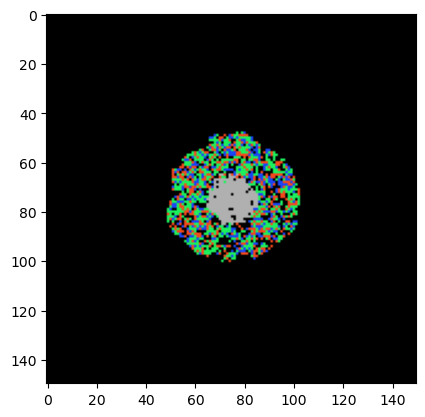

In [3]:
#Open the tumor instance
automatonHeight = 150
automatonWidth = 150
tissue = Tissue(automatonHeight, automatonWidth)
tissue = tissue.importTumorInstance("tumor_instance.pkl")

plt.figure()
plt.imshow(tissue.getPicture(True))

In [4]:
#Proliferating and tip cell positions
tumorSlices = tissue.evolutionMovie

proliferatingPositions = np.zeros((automatonHeight, automatonWidth))
finalSlice = tumorSlices[:,:,:,-1]
for i in range(0,automatonHeight):
    for j in range(0,automatonWidth):
        if((finalSlice[i,j,:] == CellType.PROLIFERATING.value).all()):
            proliferatingPositions[i,j] = 1

#Tipcells will start in some portions of the automaton borders
tipCellLocations = np.zeros((automatonHeight, automatonWidth))

for i in range(0, automatonWidth):
    #Every 10 positions in the automaton border set a tip cell
    if(i % 10 == 0):
        tipCellLocations[1,i] = 1
        tipCellLocations[automatonHeight-2,i] = 1
        tipCellLocations[i,1] = 1
        tipCellLocations[i,automatonWidth-2] = 1

In [5]:
nNetworks = 100
#We vary the eta parameter of the angiogenesis model to obtain blood vessel networks with distinct
#average centrality degrees
etaValues = np.linspace(0,0.035,nNetworks)
networkSteps = 120
automatonToGraph = AutomatonToGraph()
automatonToGraph.differenceRadius = 0
averageDegreeValues = []
averageDegree = 0
for i in range(0,len(etaValues)):
    print(i)
    print(averageDegree)
    eta = etaValues[i]
    angioModel = AngiogenesisModel(automatonWidth, automatonHeight)
    angioModel.setInitialConcentrations(proliferatingPositions)
    angioModel.setTipCells(tipCellLocations)
    angioModel.eta = eta
    angioModel.evolveSystem(networkSteps)
    #Exportamos
    angioModel.saveBloodVesselNetworkInstance("Bloodvessel_objects/network_" + str(i) + ".pkl")
    print("Exported instance")
    angioNet = automatonToGraph.convertAutomatonToGraphWithTumor(angioModel.occupiedCells, proliferatingPositions)
    angioNet.exportAdjacencyTable("Adjacency_Matrices/network_"+str(i)+".csv")
    averageDegree = angioNet.getAverageDegree()
    averageDegreeValues.append(averageDegree)
    clear_output(wait = True)

0
0


KeyboardInterrupt: 

Text(0.5, 1.0, 'eta - AverageDegree')

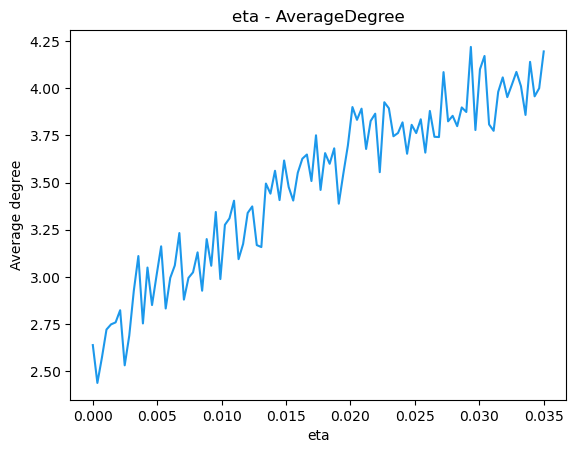

In [5]:
plt.figure()
plt.plot(etaValues, averageDegreeValues, color = "#1c98eb")
plt.xlabel("eta")
plt.ylabel("Average degree")
plt.title("eta - AverageDegree")